In [1]:
import pandas as pd
import nltk
from collections import defaultdict
import matplotlib.pyplot as plt

### Read data

In [2]:
with open("../data/article.txt ", 'r', encoding='utf-8') as file:
    article = file.read()

- Tokenize article into sentences.
- Tokenize each sentence in sentences into words.
- Tag each tokenized sentence into parts of speech.
- Chunk each tagged sentence into named-entity chunks.
- Get named-entities.

In [3]:
# Tokenize the article into sentences: sentences
sentences = nltk.sent_tokenize(article)

# Tokenize each sentence into words: token_sentences
token_sentences = [nltk.word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)

(NE System/NNP)
(NE Statistical/NNP Process/NNP Control/NNP)
(NE Mark/NNP)
(NE Admiral/NNP Grace/NNP Hopper/NNP)
(NE FOLDOC/NNP)
(NE Harvard/NNP Mark/NNP)
(NE Harvard/NNP University/NNP)
(NE Thomas/NNP Edison/NNP)
(NE Robert/NNP Oppenheimer/NNP)
(NE WWII/NNP)
(NE Los/NNP Alamos/NNP)
(NE UC/NNP Berkeley/NNP)
(NE Oxford/NNP English/NNP)
(NE Royal/NNP Aeronautical/NNP Society/NNP)
(NE GillS/NNP)
(NE Gill/NNP)
(NE Mistakes/NNP)
(NE EDSAC/NNP)
(NE Royal/NNP Society/NNP)
(NE London/NNP)
(NE Series/NNP A/NNP)
(NE Mathematical/NNP)
(NE Physical/NNP Sciences/NNPS)
(NE Vol/NNP)
(NE ACM/NNP National/NNP)
(NE John/NNP B./NNP Jackson/NNP)
(NE Edmund/NNP Klein/NNP)
(NE Walter/NNP Orvedahl/NNP)
(NE James/NNP)
(NE MANIAC/NNP)
(NE Toronto/NNP)
(NE Compatible/JJ)
(NE Compatible/NNP)
(NE Elusive/NNP Computer/NNP)
(NE Elusive/NNP Computer/NNP Bug/NNP)
(NE IEEE/NNP Annals/NNP)
(NE Java/NNP)
(NE Unix/NNP)
(NE BIOSes/NNP)
(NE ICEs/NNP)
(NE Parallel/NNP)
(NE BASIC/NNP)
(NE TRON/NNP)
(NE TRON/NNP)
(NE BASIC/NN

* Extract the groupings (types) of the named entities 
* Use a pie chart to plot the NE types

(PERSON Further/NNP)
(PERSON System/NNP)
(GPE Profiling/NNP)
(PERSON Statistical/NNP Process/NNP Control/NNP)
(ORGANIZATION Mark/NNP)
(ORGANIZATION Admiral/NNP Grace/NNP Hopper/NNP)
(PERSON Grace/NNP Hopper/NNP)
(ORGANIZATION FOLDOC/NNP)
(ORGANIZATION Harvard/NNP Mark/NNP)
(ORGANIZATION Harvard/NNP University/NNP)
(PERSON Thomas/NNP Edison/NNP)
(PERSON Grace/NNP Hopper/NNP)
(PERSON Robert/NNP Oppenheimer/NNP)
(ORGANIZATION WWII/NNP)
(ORGANIZATION Los/NNP Alamos/NNP)
(PERSON Ernest/NNP Lawrence/NNP)
(ORGANIZATION UC/NNP Berkeley/NNP)
(PERSON Oxford/NNP English/NNP)
(ORGANIZATION Journal/NNP)
(ORGANIZATION Royal/NNP Aeronautical/NNP Society/NNP)
(ORGANIZATION GillS/NNP)
(GPE Gill/NNP)
(ORGANIZATION Diagnosis/NNP)
(GPE Mistakes/NNP)
(GPE Programmes/NNP)
(ORGANIZATION EDSAC/NNP)
(ORGANIZATION Royal/NNP Society/NNP)
(GPE London/NNP)
(PERSON Series/NNP)
(PERSON Mathematical/NNP)
(ORGANIZATION Physical/NNP Sciences/NNPS)
(PERSON Vol/NNP)
(ORGANIZATION Association/NNP)
(ORGANIZATION Computing/

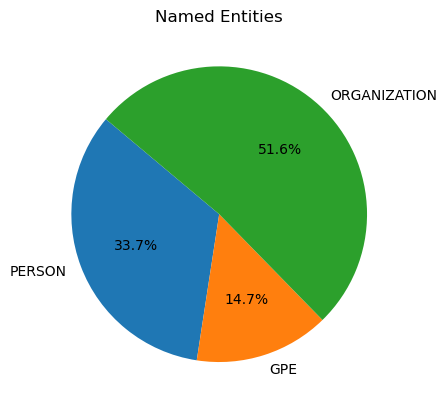

In [11]:
# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences)

# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label"):
            ner_categories[chunk.label()] += 1
            print(chunk)
            
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())


# Create a list of the values: values
values = [ner_categories.get(v) for v in labels]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Named Entities')
plt.show()